In [1]:
# Connect to the database
import datajoint as dj
acquisition = dj.create_virtual_module("aeon_test_acquisition", "aeon_test_acquisition")
streams = dj.create_virtual_module("aeon_test_streams", "aeon_test_streams")

[2023-07-13 19:44:59,282][INFO]: Connecting jbhagat@aeon-db2:3306
[2023-07-13 19:44:59,298][INFO]: Connected jbhagat@aeon-db2:3306


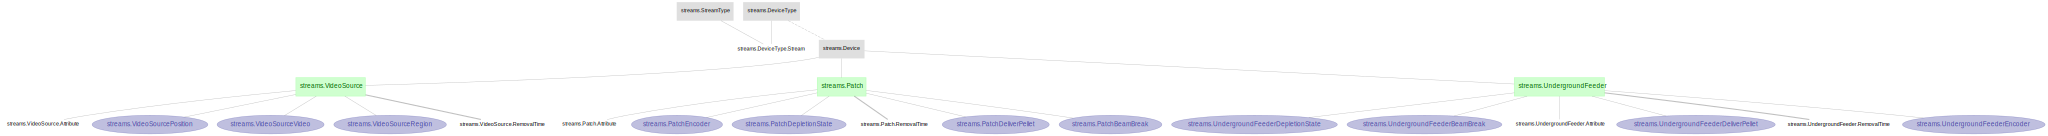

In [2]:
dj.Diagram(streams)

In [3]:
acquisition.Experiment.Directory()  # raw data read from this directory

experiment_name e.g exp0-r0,directory_type,repository_name,directory_path
exp0.2-r0,quality-control,ceph_aeon,aeon/data/qc/AEON2/experiment0.2
exp0.2-r0,raw,ceph_aeon,aeon/data/raw/AEON2/experiment0.2
presocial0.1-a2,raw,ceph_aeon,aeon/data/raw/AEON2/presocial0.1
presocial0.1-a3,raw,ceph_aeon,aeon/data/raw/AEON3/presocial0.1
presocial0.1-a4,raw,ceph_aeon,aeon/data/raw/AEON4/presocial0.1


In [4]:
display(streams.StreamType())
display(streams.DeviceType.Stream())
display(streams.Device())

stream_type,stream_reader name of the reader class found in `aeon_mecha` package (e.g. aeon.io.reader.Video),stream_reader_kwargs keyword arguments to instantiate the reader class,stream_description,"stream_hash hash of dict(stream_reader_kwargs, stream_reader=stream_reader)"
BackgroundColor,aeon.io.reader.Csv,=BLOB=,,5db1b232-45b5-c2d1-882d-c1bc59c5945d
BeamBreak,aeon.io.reader.BitmaskEvent,=BLOB=,,b14171e6-d27d-117a-ae73-a16c4b5fc8a2
BeamBreak0,aeon.io.reader.DigitalBitmask,=BLOB=,,67f8301f-7891-143e-9817-389c50cec2d5
BeamBreak1,aeon.io.reader.DigitalBitmask,=BLOB=,,2064e46c-a7e9-3f71-2f9b-fc3985845f73
BeamBreak2,aeon.io.reader.DigitalBitmask,=BLOB=,,a6f0a263-1461-813d-17a7-af4bcfb0e558


device_type,stream_type
Patch,BeamBreak
Patch,DeliverPellet
Patch,DepletionState
Patch,Encoder
UndergroundFeeder,BeamBreak


device_serial_number,device_type
COM4,Patch
COM7,Patch
21053810,VideoSource
21053811,VideoSource
21177888,VideoSource


In [5]:
display(acquisition.Epoch())
display(acquisition.Chunk())

experiment_name e.g exp0-r0,epoch_start
presocial0.1-a2,2023-02-25 18:03:49
presocial0.1-a2,2023-02-25 18:26:39
presocial0.1-a2,2023-02-25 18:30:19
presocial0.1-a2,2023-02-25 18:38:03
presocial0.1-a2,2023-02-27 14:27:37


experiment_name e.g exp0-r0,chunk_start datetime of the start of a given acquisition chunk,chunk_end datetime of the end of a given acquisition chunk,directory_type,epoch_start
presocial0.1-a2,2023-02-25 18:00:00,2023-02-25 18:26:39,raw,2023-02-25 18:03:49
presocial0.1-a2,2023-02-25 18:26:39,2023-02-25 18:30:19,raw,2023-02-25 18:26:39
presocial0.1-a2,2023-02-25 18:30:19,2023-02-25 18:38:03,raw,2023-02-25 18:30:19
presocial0.1-a2,2023-02-25 18:38:03,2023-02-25 19:00:00,raw,2023-02-25 18:38:03
presocial0.1-a2,2023-02-27 14:00:00,2023-02-27 14:31:29,raw,2023-02-27 14:27:37


In [6]:
streams.PatchBeamBreak()

experiment_name e.g exp0-r0,device_serial_number,patch_install_time time of the patch placed and started operation at this position,chunk_start datetime of the start of a given acquisition chunk,sample_count number of data points acquired from this stream for a given chunk,timestamps (datetime) timestamps of BeamBreak data,event
presocial0.1-a2,COM4,2023-02-25 18:03:49,2023-02-25 18:26:39,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-25 18:03:49,2023-02-25 18:30:19,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-25 18:03:49,2023-02-25 18:38:03,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-25 18:03:49,2023-02-27 14:00:00,0,=BLOB=,=BLOB=
presocial0.1-a2,COM4,2023-02-27 14:31:29,2023-02-27 14:31:29,11,=BLOB=,=BLOB=


In [7]:
patch_df = streams.PatchBeamBreak().fetch(format="frame")
display(patch_df.tail())

sample_count  \
experiment_name device_serial_number patch_install_time  chunk_start                         
presocial0.1-a2 COM7                 2023-03-20 17:40:30 2023-06-22 12:00:00            44   
                                                         2023-06-22 13:00:00            20   
                                                         2023-06-22 14:00:00             0   
                                                         2023-06-22 15:00:00            18   
                                                         2023-06-27 13:00:00             0   

                                                                                                                     timestamps  \
experiment_name device_serial_number patch_install_time  chunk_start                                                              
presocial0.1-a2 COM7                 2023-03-20 17:40:30 2023-06-22 12:00:00  [2023-06-22T12:09:25.166975975, 2023-06-22T12:...   
                                                         2023-06-22 13:00:00  [2023-06-22T13:14:02.367519855, 2023-06-22T13:...   
                                                         2023-06-22 14:00:00                                                 []   
                                                         2023-06-22 15:00:00  [2023-06-22T15:03:22.995264053, 2023-06-22T15:...   
                                                         2023-06-27 13:00:00                                                 []   

                                                                                                                          event  
experiment_name device_serial_number patch_install_time  chunk_start                                                             
presocial0.1-a2 COM7                 2023-03-20 17:40:30 2023-06-22 12:00:00  [BeamBroken, BeamBroken, BeamBroken, BeamBroke...  
                                                         2023-06-22 13:00:00  [BeamBroken, BeamBroken, BeamBroken, BeamBroke...  
                                                         2023-06-22 14:00:00                                                 []  
                                                         2023-06-22 15:00:00  [BeamBroken, BeamBroken, BeamBroken, BeamBroke...  
                                                         2023-06-27 13:00:00                                                 []

In [8]:
patch1_ts_dj = (
    streams.PatchBeamBreak 
    & 'chunk_start="2023-06-22 12:00:00"' 
    & 'device_serial_number="COM7"'
).fetch1("timestamps")
print(patch1_ts_dj)

['2023-06-22T12:09:25.166975975' '2023-06-22T12:09:25.181632042'
 '2023-06-22T12:13:45.677824020' '2023-06-22T12:13:45.697696209'
 '2023-06-22T12:14:00.239103794' '2023-06-22T12:14:00.255328178'
 '2023-06-22T12:14:14.708576202' '2023-06-22T12:14:14.749536037'
 '2023-06-22T12:14:16.144320011' '2023-06-22T12:14:16.160448074'
 '2023-06-22T12:14:38.565824032' '2023-06-22T12:14:38.582687855'
 '2023-06-22T12:14:50.928639889' '2023-06-22T12:14:50.948063850'
 '2023-06-22T12:15:11.281919956' '2023-06-22T12:15:11.297056198'
 '2023-06-22T12:16:18.606400013' '2023-06-22T12:16:18.626399994'
 '2023-06-22T12:16:18.631392002' '2023-06-22T12:16:18.651328087'
 '2023-06-22T12:16:41.797279835' '2023-06-22T12:16:41.811391830'
 '2023-06-22T12:16:41.814271927' '2023-06-22T12:16:41.843935966'
 '2023-06-22T12:17:14.964543819' '2023-06-22T12:17:14.979648113'
 '2023-06-22T12:17:14.982495785' '2023-06-22T12:17:15.010560036'
 '2023-06-22T12:17:36.149312019' '2023-06-22T12:17:36.182752132'
 '2023-06-22T12:17:53.973

In [9]:
from aeon.io import api
from aeon.schema.dataset import exp02
from aeon.io import reader
from pathlib import Path
import pandas as pd

In [10]:
root = "/ceph/aeon/aeon/data/raw/AEON2/presocial0.1"
start=pd.Timestamp("2023-06-22 12:00:00")
end=pd.Timestamp("2023-06-22 12:38:00")
harp_reader = reader.Harp(pattern="Patch1_32*", columns=["DetectPellet"])
new_pellet_det_bitmask = api.load(root, harp_reader, start=start, end=end).iloc[0, 0]
new_pellet_det_reader_p1 = reader.BitmaskEvent("Patch1_32*", new_pellet_det_bitmask, "PelletDetected")

patch1_ts_api = api.load(
    root=root,
    reader=new_pellet_det_reader_p1,
    start=start, 
    end=end
)

In [11]:
print(len(patch1_ts_api))
print(len(patch1_ts_dj))

44
44
